# Load all structs and functions

In [1]:
include("src/EchoVisualization.jl")
include("src/ElectionVisualization.jl")
using StatsBase:sample

# Create a connected graph Topology

In [2]:
number_of_nodes = 26
g = create_scale_free_topology(number_of_nodes)

{26, 48} undirected simple Int64 graph

# Create processes on the nodes and select initiating ones

In [3]:
number_of_initiators = 15
processlabels = 'a':'z'
process_ids = Int64.(processlabels)
processlabels = ["$c" for c in processlabels]
process_id_label_map = Dict(i => c for (i,c) in zip(process_ids, processlabels))
initiators = sample(process_ids, number_of_initiators, replace = false)
initiators'

1×15 adjoint(::Vector{Int64}) with eltype Int64:
 118  117  105  98  119  100  107  121  122  109  104  102  101  113  103

# Initialize General Election Algorithm and visualizations

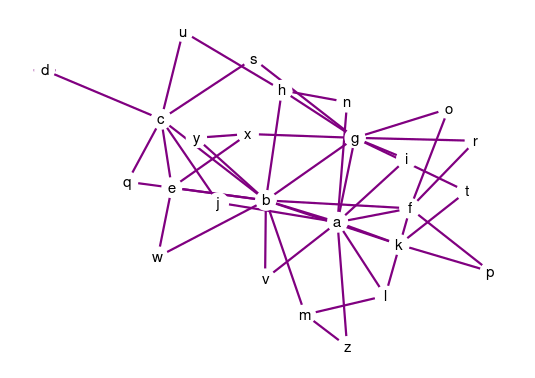

In [4]:
elec_alg = ElectionAlgorithm{Int64}(g, process_ids, initiators)
init_election_algorithm!(elec_alg)
elec_fgp = FixedGraphPlot{Int64}(g, nodelabels=processlabels)
layout = (elec_fgp.locs_x, elec_fgp.locs_y)
echo_alg = elec_alg.echo_algorithms[argmax(initiators)] # this is the winning algorithm
min_echo_alg = elec_alg.echo_algorithms[argmin(initiators)] # this is a loosing algorithm
echo_fgp = FixedGraphPlot{Int64}(g, layout=layout)
echo_min_fgp = FixedGraphPlot{Int64}(g, layout=layout)

elec_gc = graph_context(elec_fgp)

# Run Algorithm and create Animations

In [5]:
elec_anim = Animation()
frame(elec_anim, elec_gc)
echo_anim = Animation()
echo_min_anim = Animation()

i = 0
while !has_winner(elec_alg)
    i += 1
    election_algorithm_step!(elec_alg)
    election_visualization!(elec_fgp, elec_alg, process_id_label_map)
    elec_gc = graph_context(elec_fgp)
    frame(elec_anim, elec_gc)
    
    echo_visualization!(echo_fgp, echo_alg)
    echo_gc = graph_context(echo_fgp)
    frame(echo_anim, echo_gc)
    
    echo_visualization!(echo_min_fgp, min_echo_alg)
    echo_min_gc = graph_context(echo_min_fgp)
    frame(echo_min_anim, echo_min_gc)
end
"$i steps"

"96 steps"

# Show the winner

In [6]:
election_algorithm_step!(elec_alg)
election_visualization!(elec_fgp, elec_alg, process_id_label_map)
elec_gc = graph_context(elec_fgp)
# save the final state a few times to see the echo tree
for i ∈ 1:20
    frame(elec_anim, elec_gc)
end
winner_id = elec_alg.winner.winner_process_id
winner_label = process_id_label_map[winner_id]
winner_node = elec_alg.initiator_id_nodes_map[winner_id]
println("And the winner is $winner_label with id $winner_id at graph node $winner_node")

And the winner is z with id 122 at graph node 26


# Save and display gif Animation

┌ Info: Saved animation to 
│   fn = /home/tom/Uni/dist-algorithms/pics/elec_algorithm.gif
└ @ Plots /home/tom/.julia/packages/Plots/9C6z9/src/animation.jl:114


Plots.AnimatedGif("/home/tom/Uni/dist-algorithms/pics/elec_algorithm.gif")
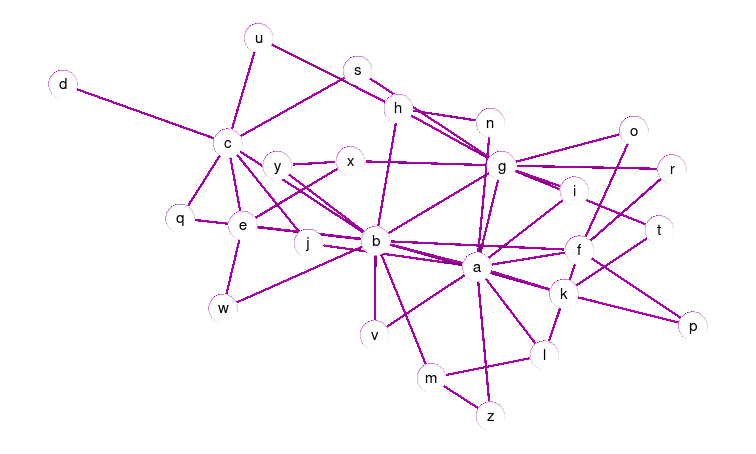

In [7]:
gif(elec_anim, "pics/elec_algorithm.gif", fps = 5)

## Legend:

node letters: process name | winner name

white: no initiator

red : active initiator node

blue : passive initiator node

green : final winner

┌ Info: Saved animation to 
│   fn = /home/tom/Uni/dist-algorithms/pics/winner_echo_algorithm.gif
└ @ Plots /home/tom/.julia/packages/Plots/9C6z9/src/animation.jl:114


Plots.AnimatedGif("/home/tom/Uni/dist-algorithms/pics/winner_echo_algorithm.gif")
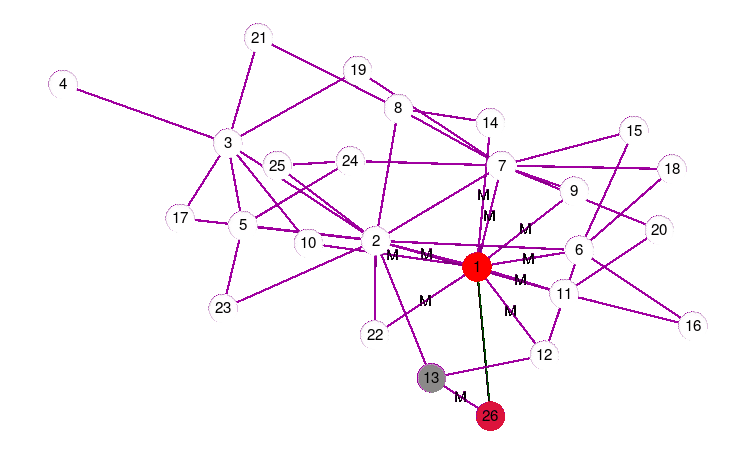

In [8]:
gif(echo_anim, "pics/winner_echo_algorithm.gif", fps = 5)

┌ Info: Saved animation to 
│   fn = /home/tom/Uni/dist-algorithms/pics/loosing_echo_algorithm.gif
└ @ Plots /home/tom/.julia/packages/Plots/9C6z9/src/animation.jl:114


Plots.AnimatedGif("/home/tom/Uni/dist-algorithms/pics/loosing_echo_algorithm.gif")
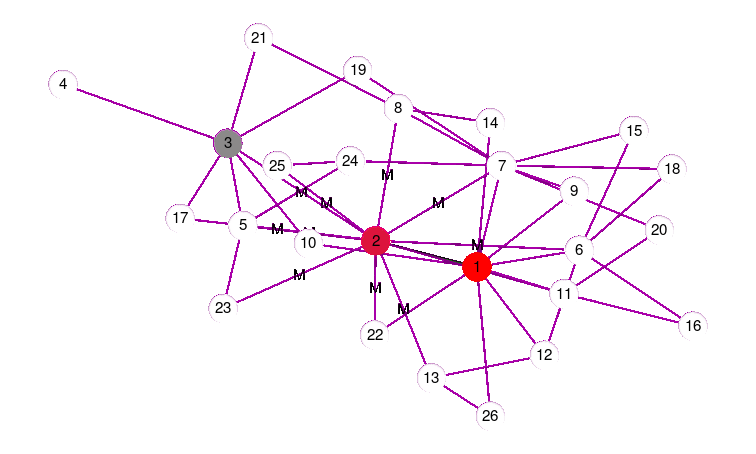

In [9]:
gif(echo_min_anim, "pics/loosing_echo_algorithm.gif", fps = 5)